<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [3]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [4]:
for i in agg.label.unique():
    print(i)

2
7
4
3
6
1
5


In [5]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.

def plot_clusters(df, name):
    groups = df.groupby('label')

# Plotting
    plt.figure(figsize=(8, 6))

# Plot points for each class with different colors
    for label, group in groups:
        plt.scatter(group['x'], group['y'], label=f'Label {label}')

    plt.title('Scatter Plot with True Labels')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()
          
    

In [6]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

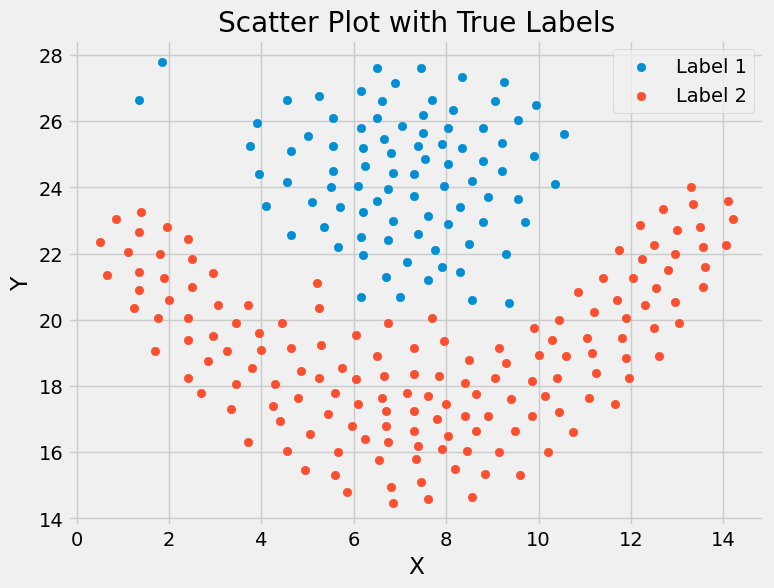

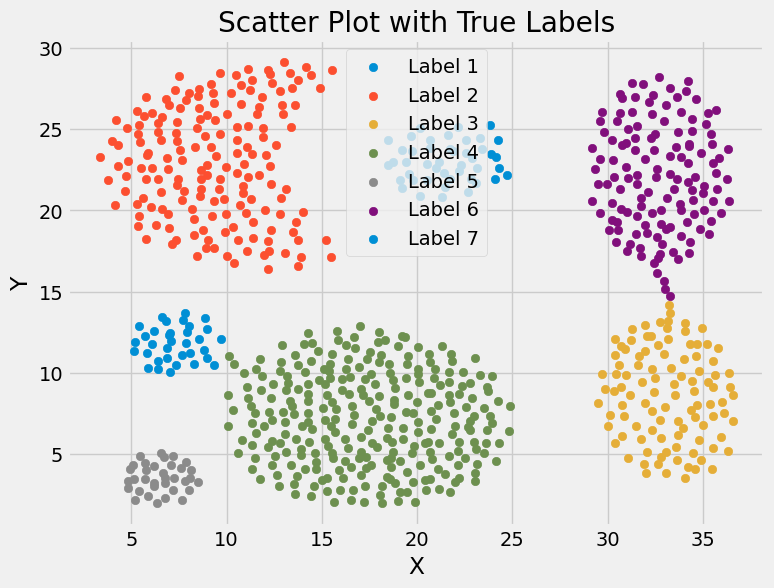

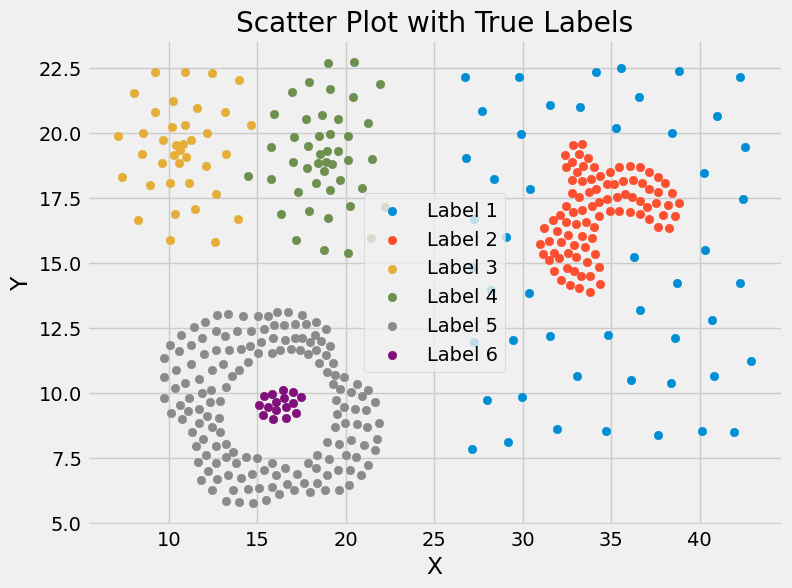

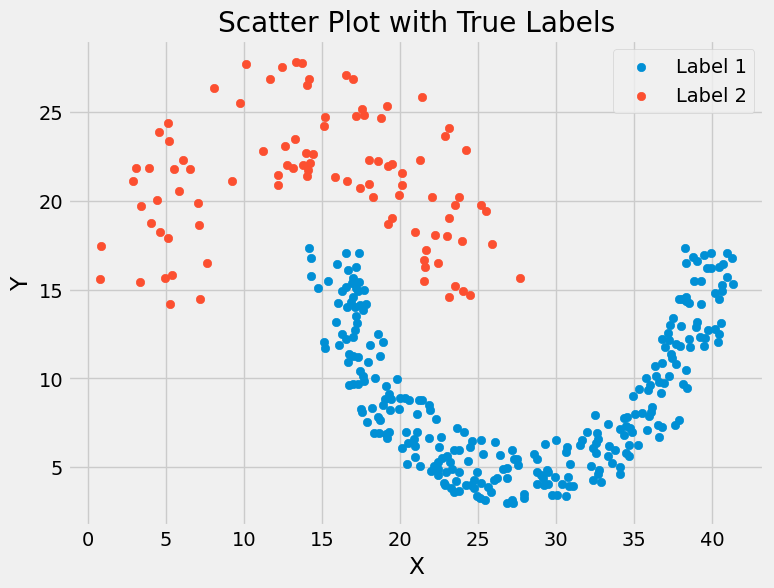

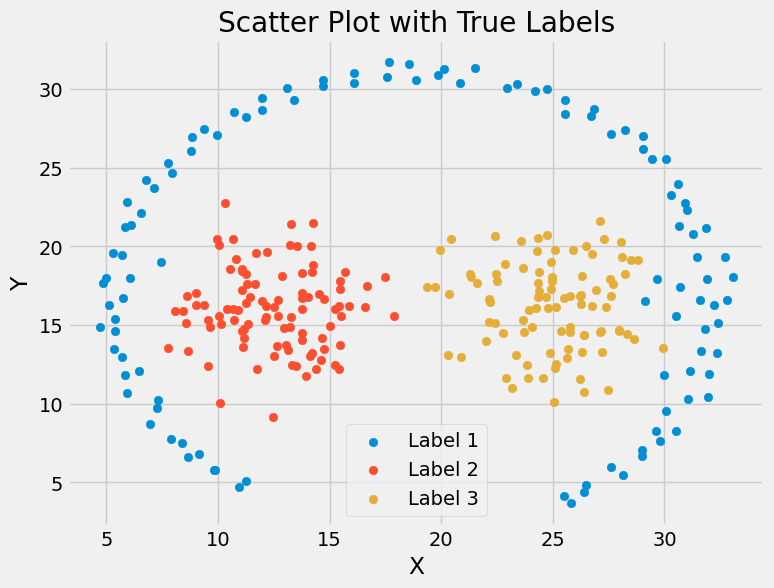

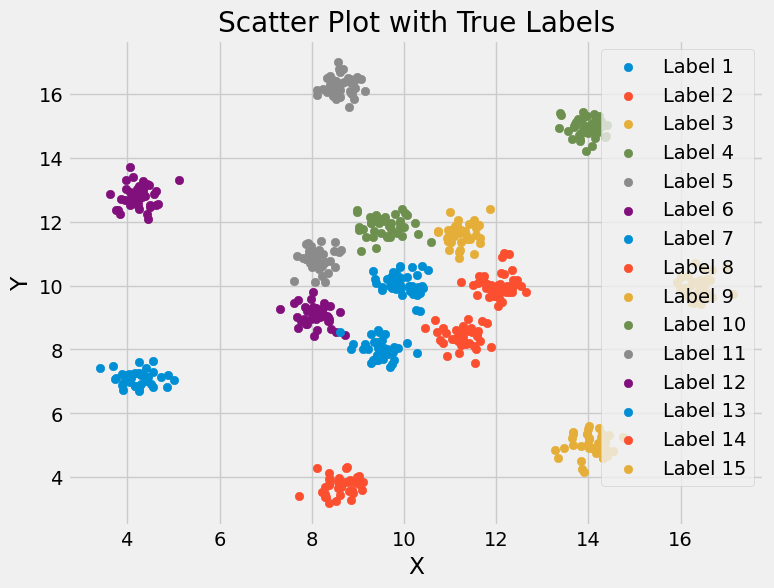

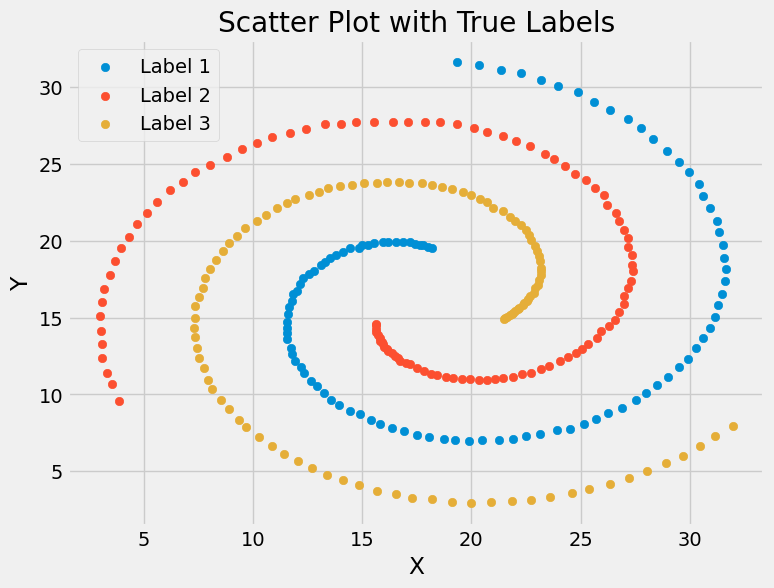

In [7]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs];

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [9]:
# Write your function to scale data here.
def scale_matrix(X):
    ss = StandardScaler()
    scaled_data = ss.fit_transform(X)
    return scaled_data, ss

scaled_X, scaler = scale_matrix(flame)



In [38]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate coloring

def plot_results(df, cl):
    cluster_labels = cl.fit_predict(df)

    # Compute silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f'Silhouette Score: {silhouette_avg}')

    # Plot the clusters
    plt.figure(figsize=(8, 6))

    # Assign colors to clusters
    unique_labels = np.unique(cluster_labels)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        cluster_points = df[cluster_labels == label]
        plt.scatter(cluster_points['x'], cluster_points['y'], c=[color], label=f'Cluster {label}')

    plt.title('Cluster Visualization')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()



 

## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

In [39]:
kmeans = KMeans(n_clusters=5)
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

In [12]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.4061884793611965


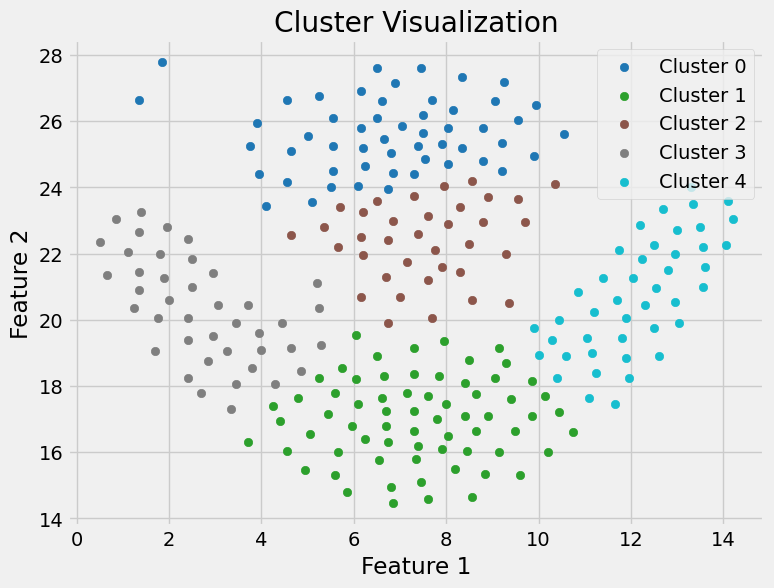

In [40]:


plot_results(flame, kmeans)

In [14]:
flame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       240 non-null    float64
 1   y       240 non-null    float64
 2   label   240 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


Silhouette Score: 0.39001576582032793


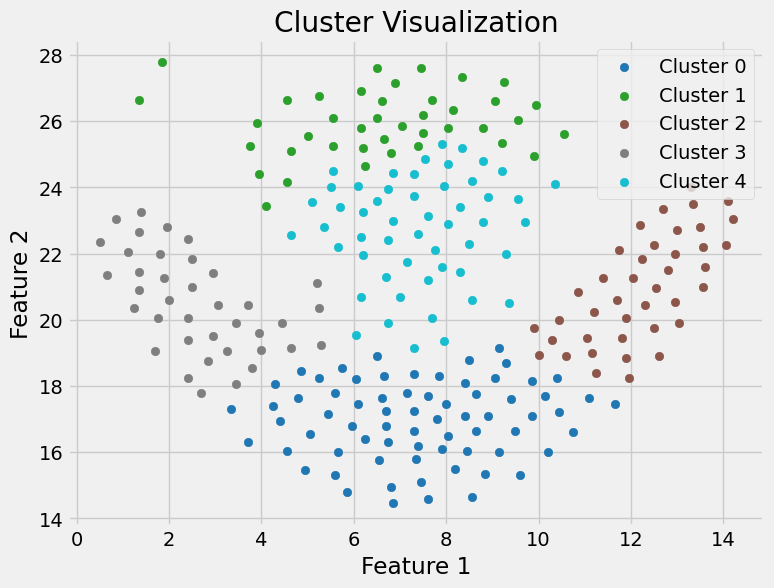

In [41]:
aggregate = AgglomerativeClustering(n_clusters=5)
plot_results(flame, aggregate)

Silhouette Score: -0.43882179047292585


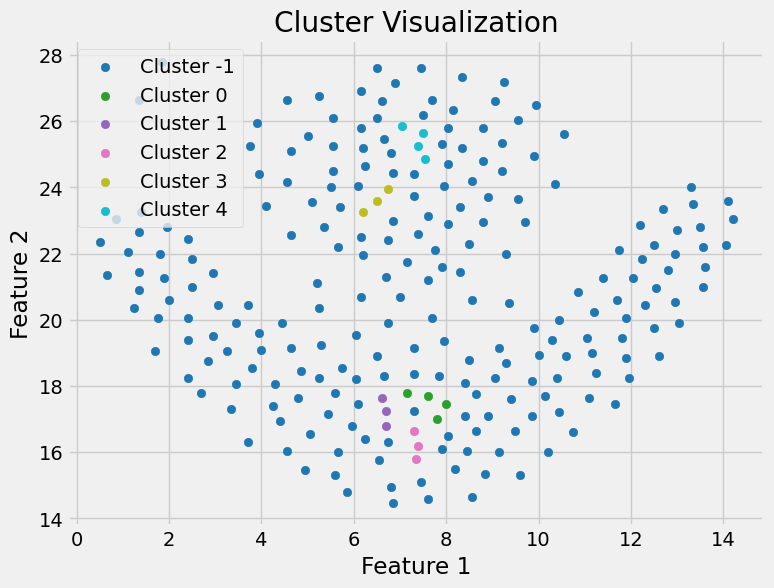

In [62]:
dbscan = DBSCAN(eps=0.5, min_samples= 3)
plot_results(flame, dbscan)

DBSCAN performs the best 

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5015094949787215


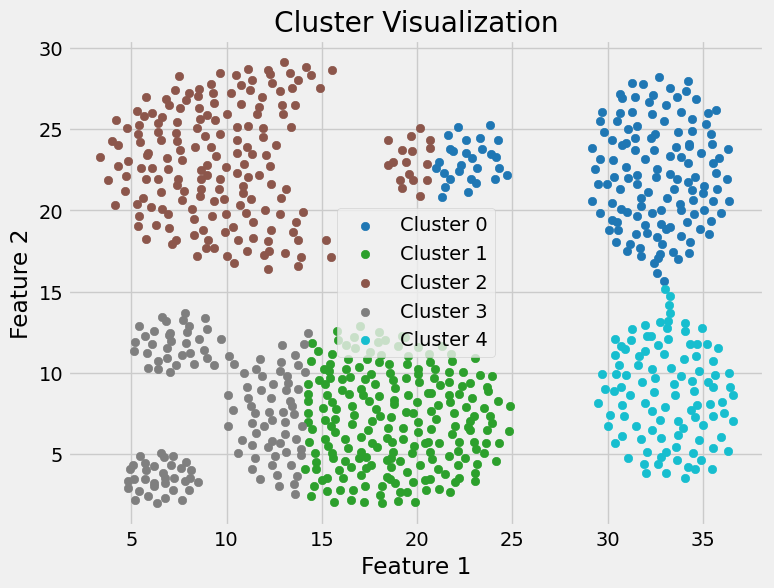

In [63]:
kmeans = KMeans(n_clusters=5)
plot_results(agg, kmeans)

Silhouette Score: 0.4479449914371764


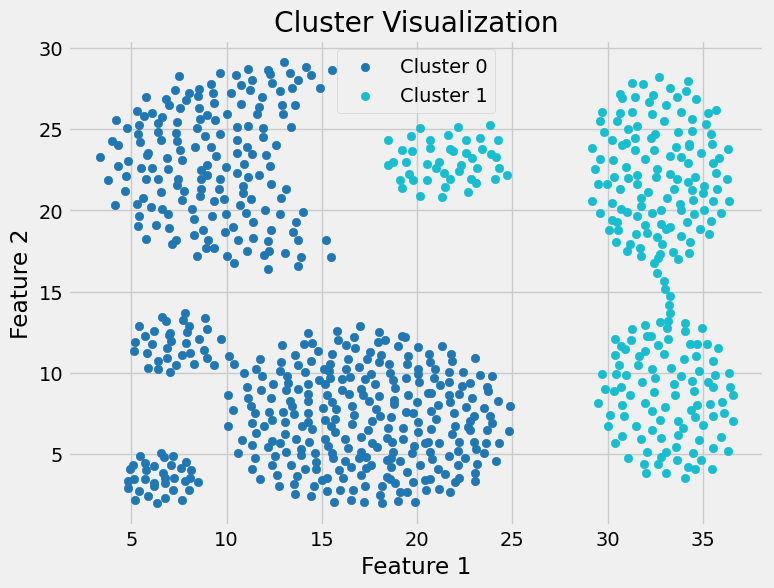

In [64]:
aggregate = AgglomerativeClustering(n_clusters=2)
plot_results(agg, aggregate)

Silhouette Score: -0.3323287418806694


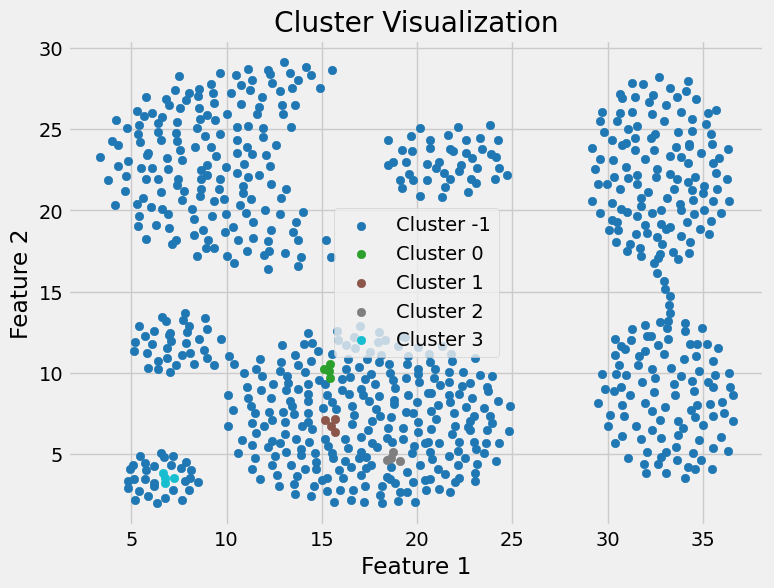

In [72]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
plot_results(agg, dbscan)

In [ ]:
# A:

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5239811043762226


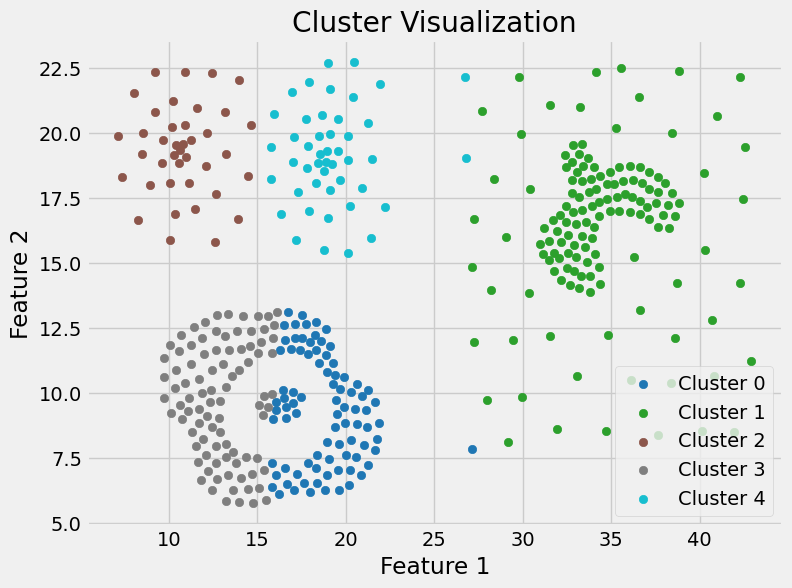

In [71]:
kmeans = KMeans(n_clusters=5)
plot_results(comp, kmeans)


Silhouette Score: 0.6406234262599314


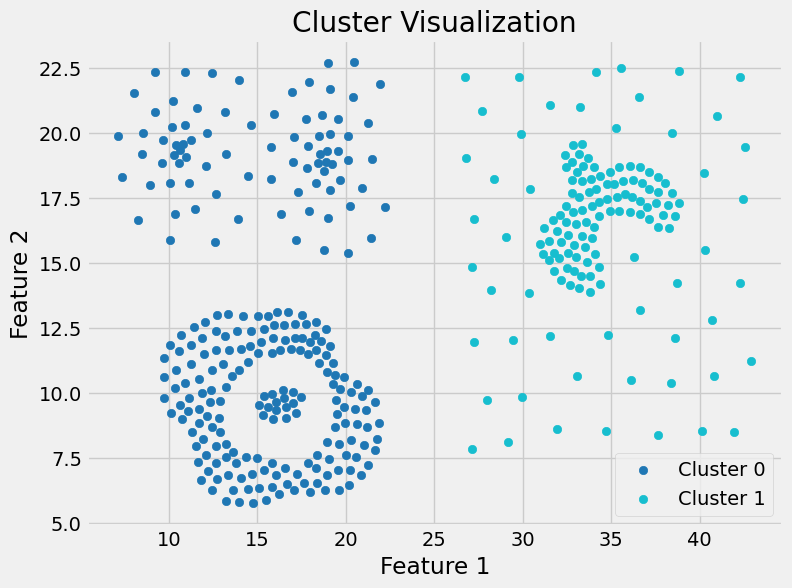

In [76]:
aggregate = AgglomerativeClustering(n_clusters=2)
plot_results(comp, aggregate)

Silhouette Score: -0.6218705345545756


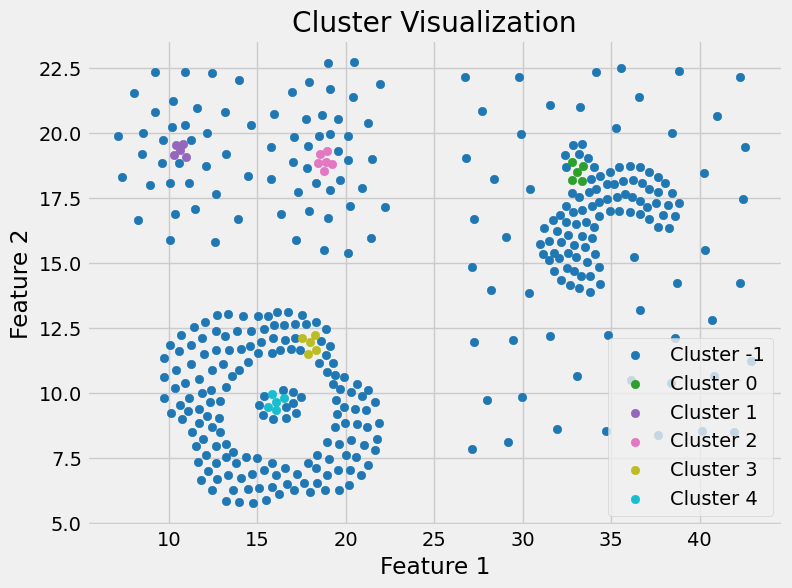

In [75]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
plot_results(comp, dbscan)

In [ ]:
# A:

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.47627061014082556


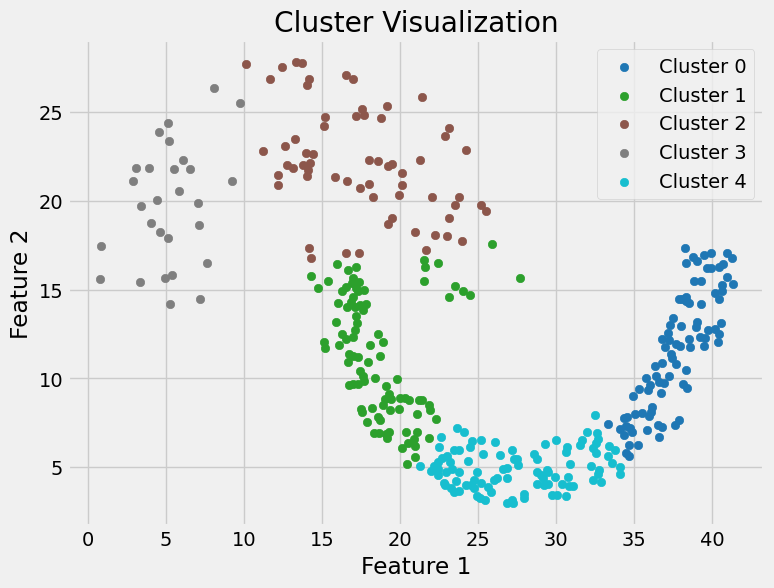

In [73]:
kmeans = KMeans(n_clusters=5)
plot_results(jain, kmeans)

Silhouette Score: 0.48559510038089915


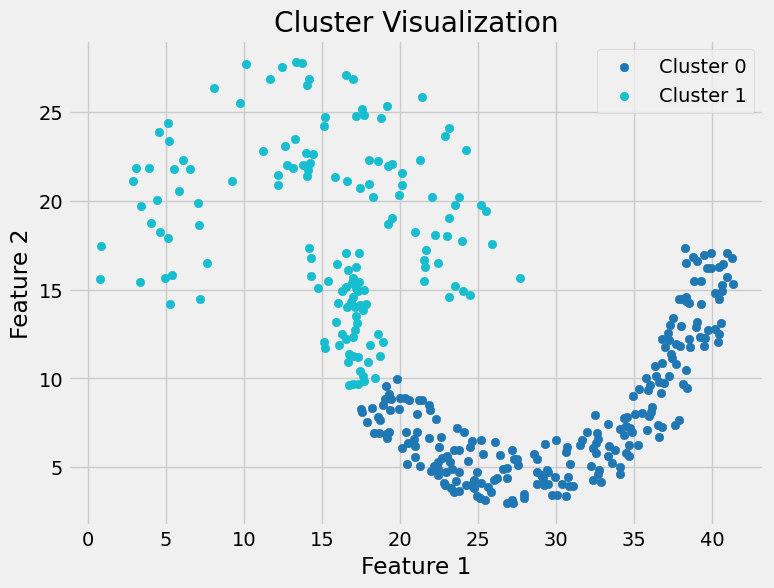

In [77]:
aggregate = AgglomerativeClustering(n_clusters=2)
plot_results(jain, aggregate)

Silhouette Score: -0.43506579319501776


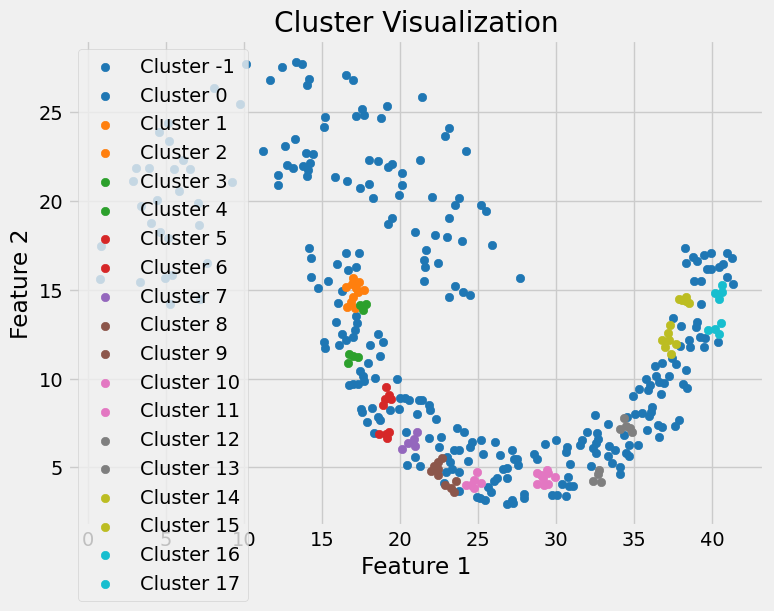

In [87]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
plot_results(jain, dbscan)

In [ ]:
# A:

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.3749358254679222


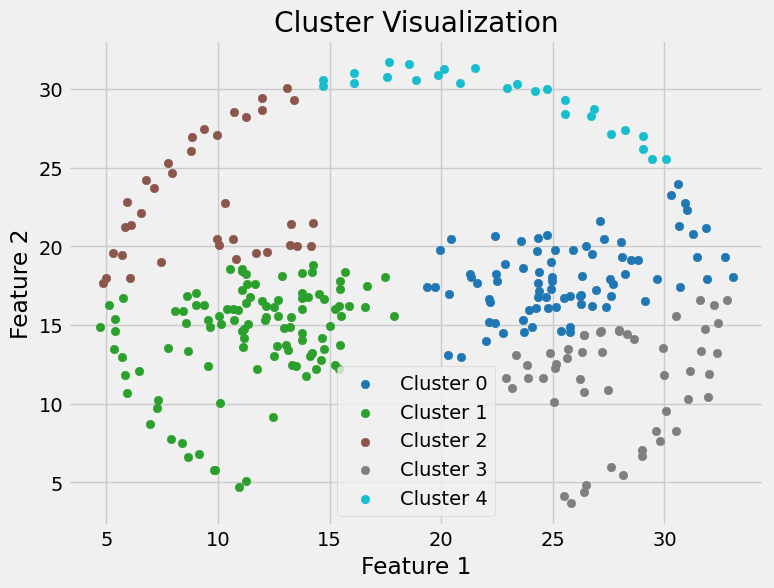

In [89]:
kmeans = KMeans(n_clusters=5)
plot_results(path, kmeans)


Silhouette Score: 0.4906314078386498


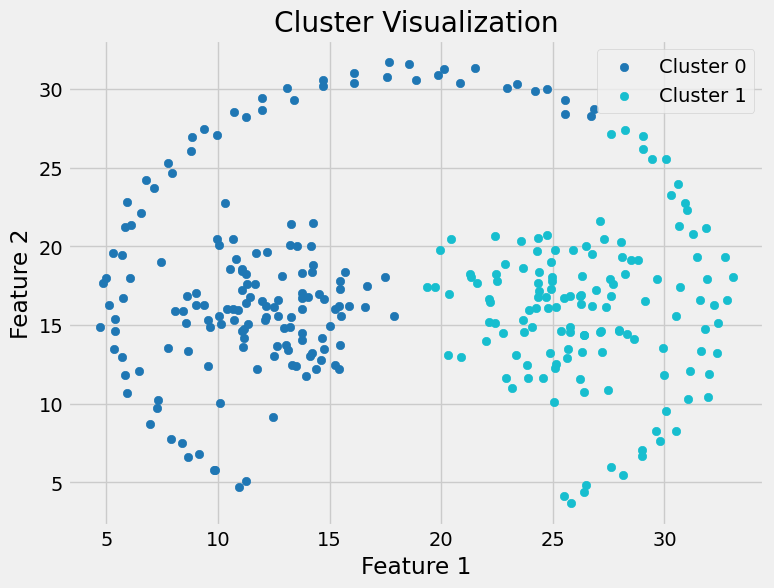

In [90]:

aggregate = AgglomerativeClustering(n_clusters=2)
plot_results(path, aggregate)


Silhouette Score: -0.4542824968692408


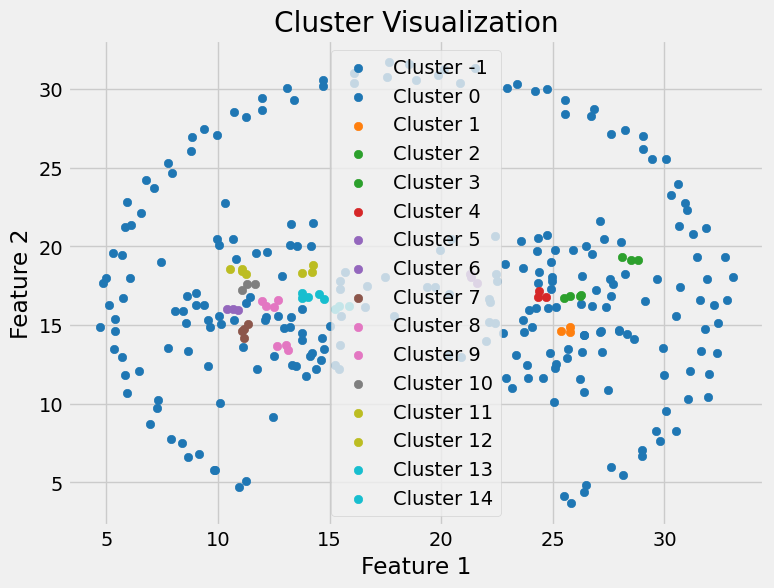

In [92]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
plot_results(path, dbscan)

In [ ]:
# A:

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.5249749955340746


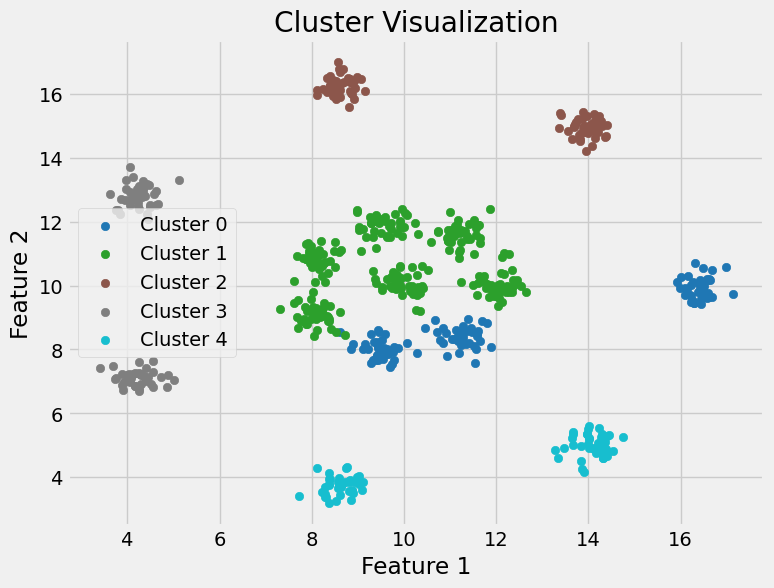

In [93]:
kmeans = KMeans(n_clusters=5)
plot_results(r15, kmeans)


Silhouette Score: 0.4009722429085183


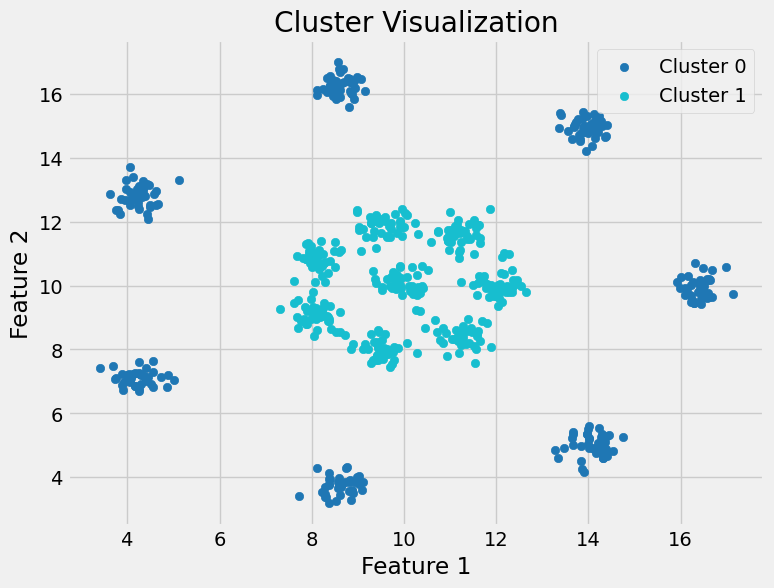

In [94]:

aggregate = AgglomerativeClustering(n_clusters=2)
plot_results(r15, aggregate)


Silhouette Score: 0.7948405130674506


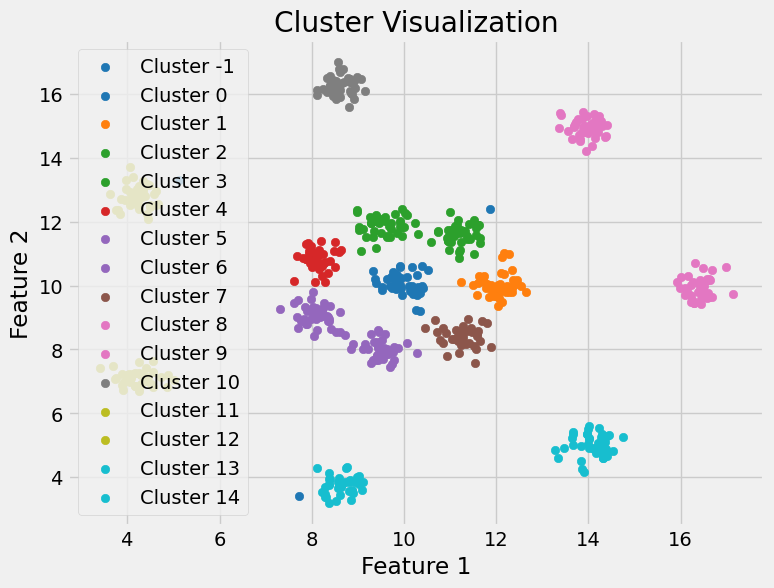

In [95]:

dbscan = DBSCAN(eps=0.5, min_samples=4)
plot_results(r15, dbscan)

In [ ]:
# A:

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

Silhouette Score: 0.34135965020008774


/Users/wz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


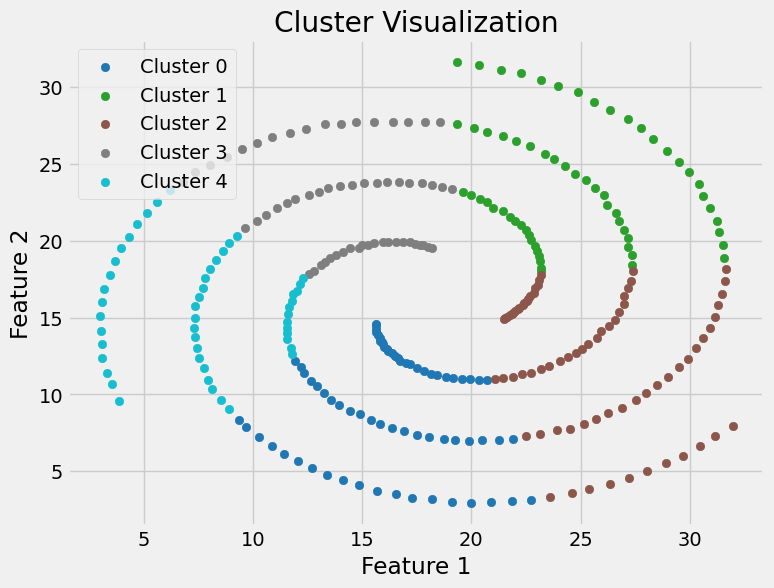

In [96]:
kmeans = KMeans(n_clusters=5)
plot_results(spiral, kmeans)


Silhouette Score: 0.31400746398263507


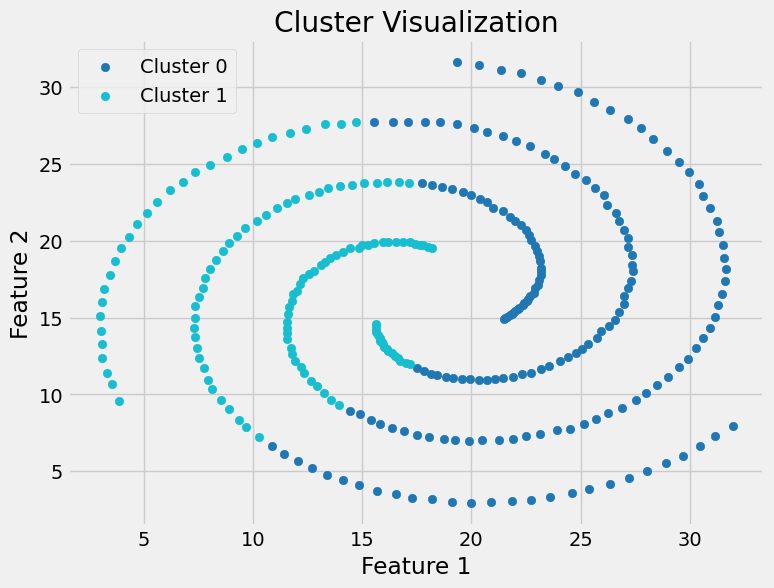

In [97]:

aggregate = AgglomerativeClustering(n_clusters=2)
plot_results(spiral, aggregate)


Silhouette Score: -0.30853264495288574


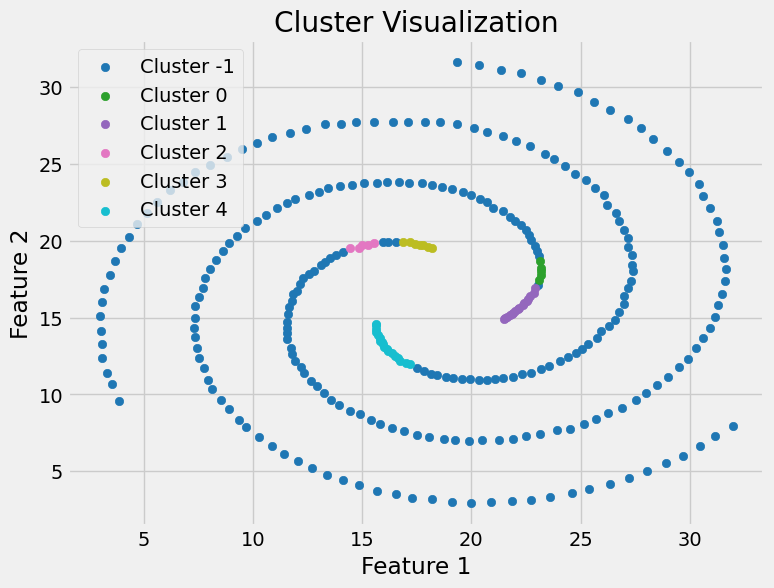

In [98]:

dbscan = DBSCAN(eps=0.5, min_samples=4)
plot_results(spiral, dbscan)

In [ ]:
# A:

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [27]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [31]:
mel = mel.rename(columns = {'Price': 'price', 'Lattitude':'lat', 'Longtitude':'long'})

In [32]:
mel.head()

,Suburb,Address,Rooms,Type,price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,lat,long,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [33]:
mel.dropna(subset = ['lat', 'long', 'price'], inplace = True)

### 5c) Plot lat vs long
What kind of clustering do you want to do?

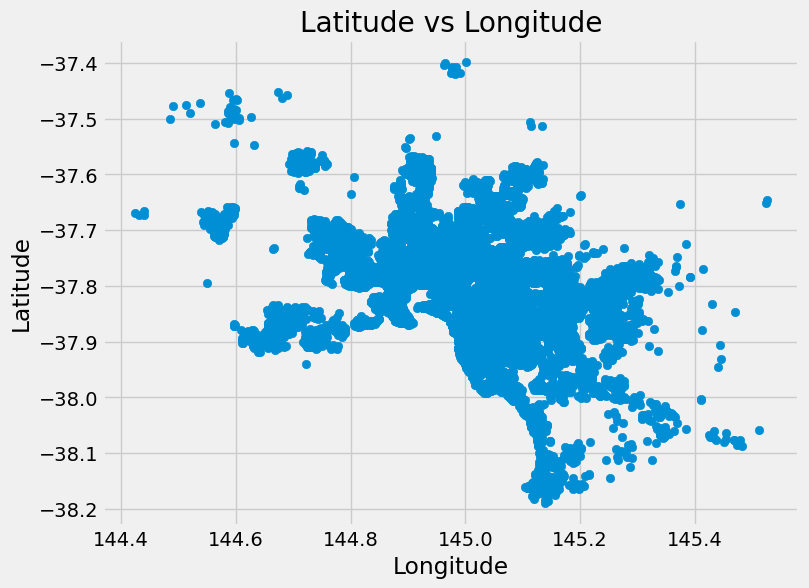

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(mel['long'], mel['lat'])
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [36]:
X = mel[['lat', 'long', 'price']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional)
X_scaled_mel = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_mel)

            lat      long     price
0      0.080367  0.013996  0.597621
1     -0.010227 -0.027437 -0.083836
2     -0.025508 -0.019150  0.574650
3      0.109838  0.001566 -0.367139
4     -0.002587 -0.021636  0.781384
...         ...       ...       ...
20988 -0.043518 -0.924374  0.017234
20989 -0.038933 -0.928434  0.597621
20990 -0.093290 -0.898685 -0.308947
20991 -0.173515 -0.979065 -0.589186
20992 -0.121560 -0.855181 -0.106807

[20993 rows x 3 columns]


In [119]:
X_scaled

array([[ 0.08036724,  0.01399583,  0.59762057],
       [-0.01022703, -0.02743694, -0.08383631],
       [-0.02550799, -0.01915039,  0.57465011],
       ...,
       [-0.09328997, -0.89868526, -0.30894678],
       [-0.17351502, -0.97906483, -0.58918635],
       [-0.12155975, -0.85518085, -0.10680676]])

In [118]:
X.head()

,lat,long,price
1,-37.7996,144.9984,1480000.0
2,-37.8079,144.9934,1035000.0
4,-37.8093,144.9944,1465000.0
5,-37.7969,144.9969,850000.0
6,-37.8072,144.9941,1600000.0


### 5e) Cluster and plot clusters

/var/folders/h4/jjrf3kz54yzf6rzl5w6qk9r40000gn/T/ipykernel_93410/3522412266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_labels'] = dbscan.fit_predict(X_scaled)


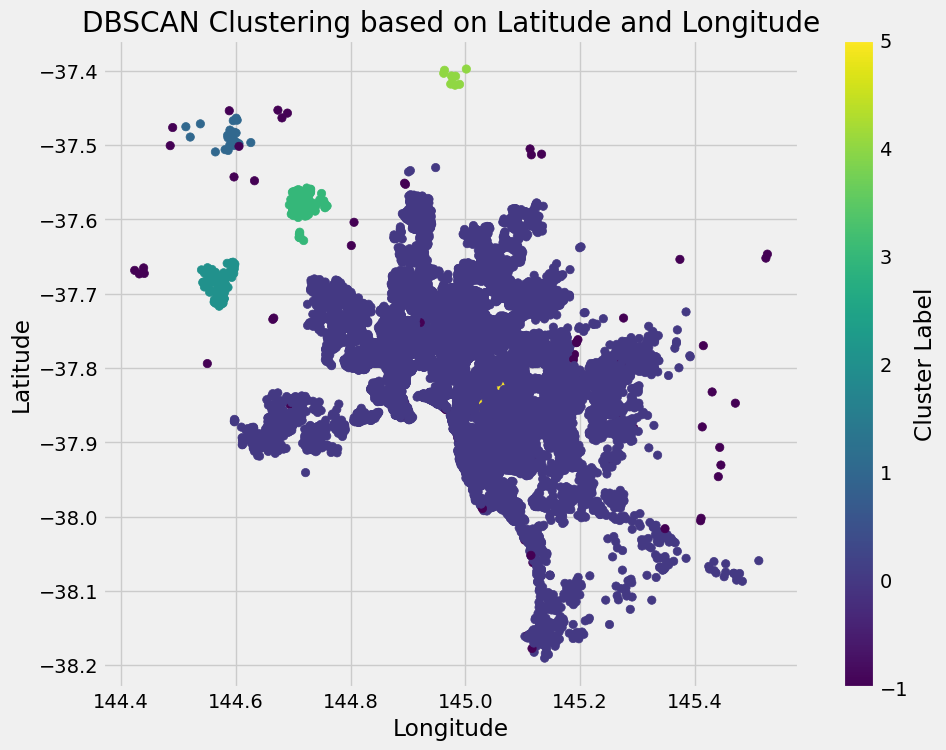

In [126]:
dbscan = DBSCAN(eps=0.5 , min_samples= 5)  # Example: Using DBSCAN with epsilon=0.5 and min_samples=5


X['cluster_labels'] = dbscan.fit_predict(X_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X['long'], X['lat'], c=X['cluster_labels'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [ ]:
mel.plot(
    kind='scatter',
    x='long',
    y='lat',
    c='cluster',
    colormap='Spectral',
    s=2,
    figsize=(8, 8)
)

In [127]:
X.head()

,lat,long,price,cluster_labels
1,-37.7996,144.9984,1480000.0,0
2,-37.8079,144.9934,1035000.0,0
4,-37.8093,144.9944,1465000.0,0
5,-37.7969,144.9969,850000.0,0
6,-37.8072,144.9941,1600000.0,0


### 5f) Do prices differ by cluster?

In [128]:
from scipy.stats import f_oneway

# Assuming 'data' is your DataFrame containing cluster labels and prices

# Step 1: Group the data by cluster
cluster_groups = X.groupby('cluster_labels')['price']

# Step 2: Perform ANOVA test
statistic, p_value = f_oneway(*[group for name, group in cluster_groups])

# Step 3: Interpret the results
if p_value < 0.05:
    print("There are significant differences in prices between clusters (p-value < 0.05)")
else:
    print("There are no significant differences in prices between clusters (p-value >= 0.05)")

There are significant differences in prices between clusters (p-value < 0.05)
